<a href="https://colab.research.google.com/github/MCABAL20/Bert---public/blob/main/data_processing_and_exploration_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mgzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mgzip: filename=mgzip-0.2.1-py3-none-any.whl size=10334 sha256=b179b30817fca89130bccc42071673343f1182372fbe8f20f8141db5cfa64885
  Stored in directory: /root/.cache/pip/wheels/e7/6e/69/e6437d02b5d32a0556b68619c3c5fef409e861ffd4abd42df9
Successfully built mgzip


In [ ]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16677 sha256=83a92b731d4c87f5caed541dea391c5d711b684e8f0d576bb2860be1f3177f9d
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
#import libraries
import nltk
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle
import mgzip
from nltk.tokenize import sent_tokenize
from pandarallel import pandarallel
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from HanTa import HanoverTagger as ht
import string
import seaborn as sns
import matplotlib.pyplot as plt
#pandarallel.initialize(progress_bar=True)
tqdm.pandas()

# Data exploration for final thesis document (pre-cleaning)

## Make wordcloud of the most common words in reviews

In [ ]:
# Load the source data
df1 = pd.read_excel("/content/df.xlsx")

In [ ]:
df1

ticket_number        id  \
0      50-70-70-20220101092234-10-1539783528  18582952   
1      50-70-70-20220101100839-10-1539810895  18887055   
2      50-70-70-20220101105512-10-1539809688  18614434   
3      50-70-70-20220101105512-10-1539809688  18904122   
4      50-70-70-20220101113531-10-1539855629  21041541   
...                                      ...       ...   
43131        7-897-897-20230520124952-6-6000  23906276   
43132        7-897-897-20230521143057-1-4634  23905721   
43133        7-897-897-20230521143057-1-4634  23905718   
43134        7-897-897-20230521143057-1-4634  23905713   
43135        7-897-897-20230524191150-8-3496  23921821   

                                                    body  purchase_checked  \
0                   Prima kwaliteit voor een nette prijs                 1   
1                                              Fijne jas                 1   
2                                Top service goede zaak.                 1   
3                Mooie jas ben er bij mee goede service.                 1   
4                                                  :yes:                 1   
...                                                  ...               ...   
43131  Fijne winkel, groot assortiment. Jammer dat de...                 1   
43132                                                Top                 1   
43133                                               Goed                 1   
43134  De drukte bij geld kassa is enorm een tweede e...                 1   
43135  Zeer fijne tas. Ruimte voor een mobiel, kleine...                 1   

       note created_at  store_code  age_min  age_max  gender  ...  \
0         5    2022-01         NaN      NaN      NaN     NaN  ...   
1         5    2022-01         NaN      NaN      NaN     1.0  ...   
2         5    2022-01         NaN      NaN      NaN     NaN  ...   
3         5    2022-02         NaN      NaN      NaN     NaN  ...   
4         5    2022-08         NaN      NaN      NaN     NaN  ...   
...     ...        ...         ...      ...      ...     ...  ...   
43131     4    2023-05         NaN      NaN      NaN     NaN  ...   
43132     5    2023-05         NaN      NaN      NaN     NaN  ...   
43133     4    2023-05         NaN      NaN      NaN     NaN  ...   
43134     3    2023-05         NaN      NaN      NaN     NaN  ...   
43135     5    2023-05         NaN     30.0     39.0     1.0  ...   

       workshop_reference_id  service_reference_id  store_reference_id  \
0                        NaN                   NaN                 NaN   
1                        NaN                   NaN                 NaN   
2                        NaN                   NaN                 NaN   
3                        NaN                   NaN                 NaN   
4                        NaN                   NaN                 NaN   
...                      ...                   ...                 ...   
43131                    NaN                   NaN                 NaN   
43132                    NaN                   NaN                 NaN   
43133                    NaN                   NaN                 NaN   
43134                    NaN                   NaN                 NaN   
43135                    NaN                   NaN                 NaN   

       website_reference_id  article_id  \
0                      68.0         NaN   
1                       NaN    631482.0   
2                      68.0         NaN   
3                       NaN    455441.0   
4                       NaN    584366.0   
...                     ...         ...   
43131                   NaN         NaN   
43132                   NaN    730684.0   
43133                   NaN    727497.0   
43134                   NaN         NaN   
43135                   NaN     85009.0   

                                                  review  tdt_type_detail  \
0                   prima kwaliteit voor een nette prijs             sale   
1       

## Make wordcloud of the most common words in reviews

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Example DataFrame column
texts = df1['review']

# List to store the tokenized words
words = []

# Iterate over each row and tokenize the text
for text in texts:
    tokens = word_tokenize(str(text))
    words.extend(tokens)

# Print the tokens
print(words)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
word_count = len(words)
print("Total number of words:", word_count)

Total number of words: 826649


In [ ]:
unique_words = set(words)
unique_word_count = len(unique_words)
print("Total number of unique words:", unique_word_count)

Total number of unique words: 30428


In [ ]:
mostcommon = FreqDist(words).most_common(100)
new_mostcommon = []
for i, x in enumerate(mostcommon):
    new_mostcommon.append(mostcommon[i][0])

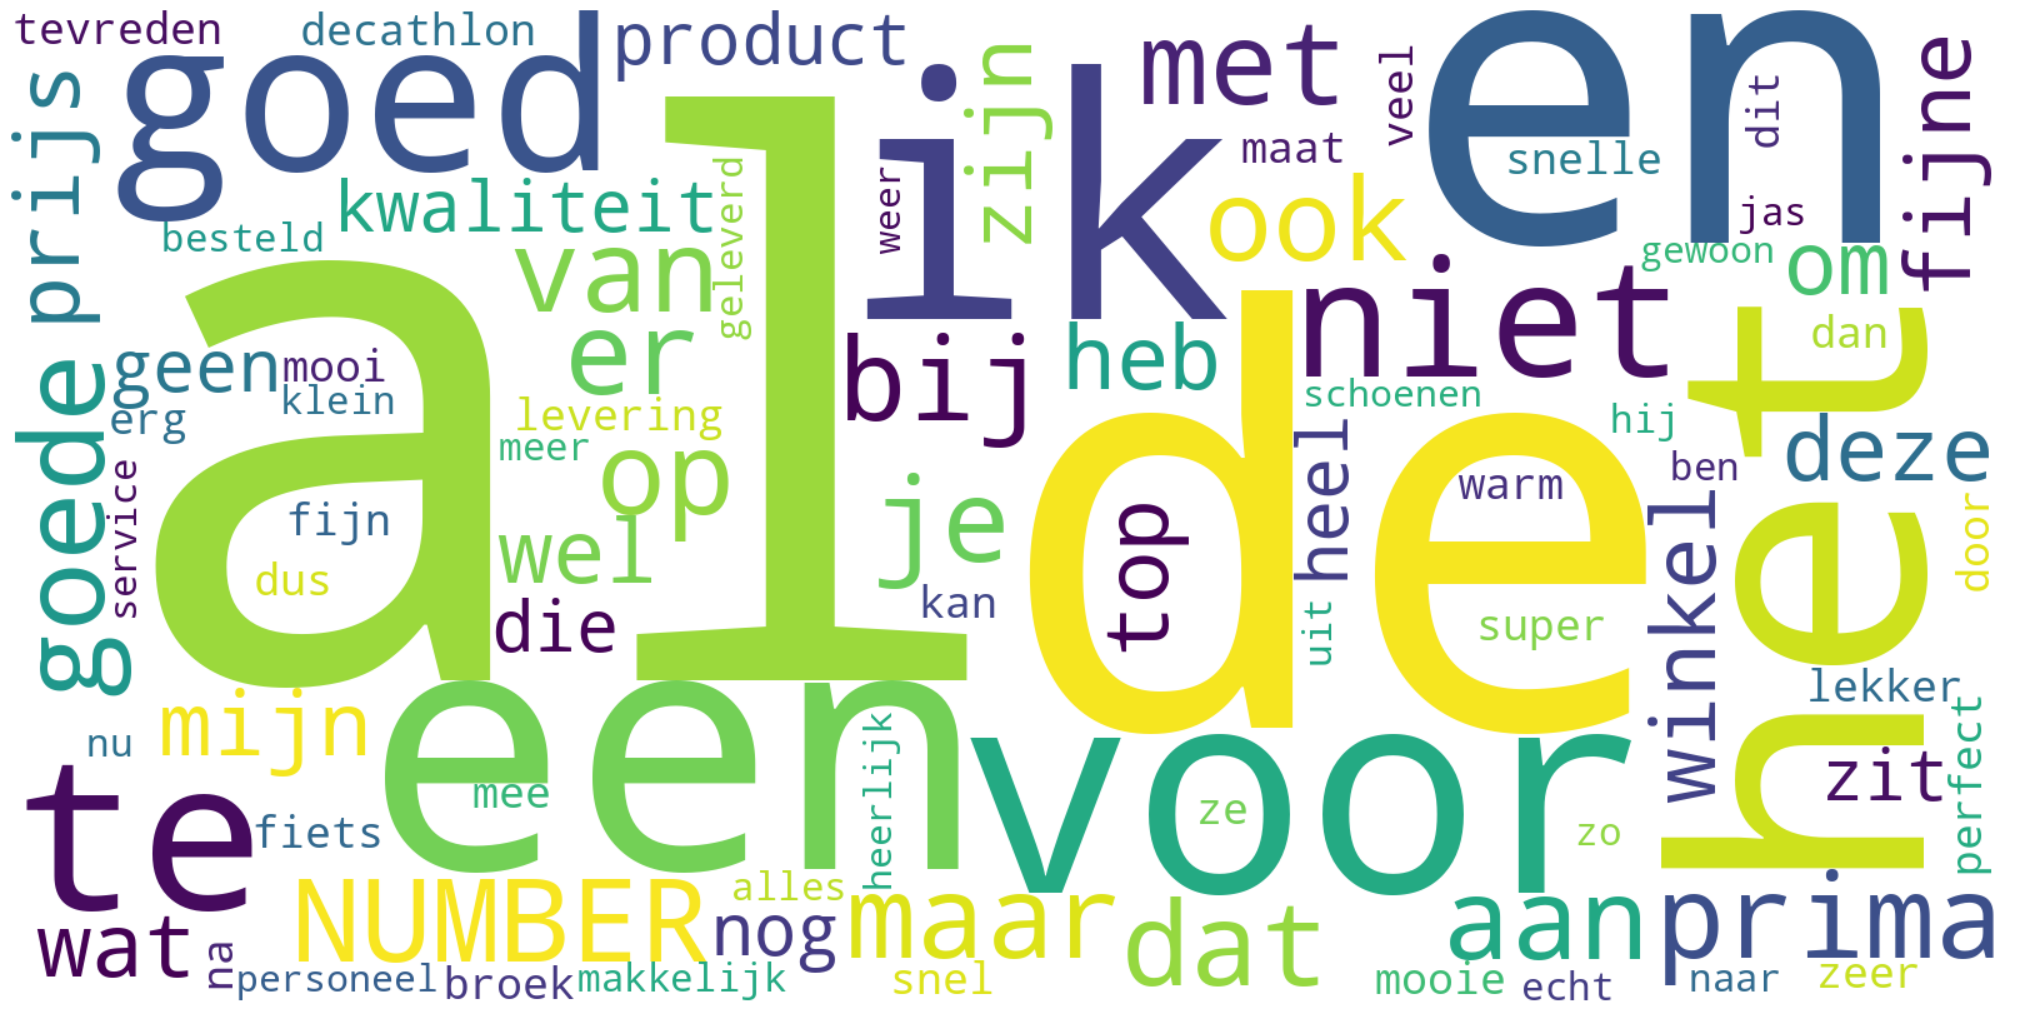

In [ ]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(new_mostcommon))
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##PRE-PROCESSING

necessary steps for the preprocessing of the data sets

**Tokenize, remove punctuation & lower casing**

In [ ]:
import re

# First stage of cleaning: Replace characters and numbers in the "Review" column
df1['review'] = df1['review'].astype(str).str.lower()
df1['review'] = df1['review'].apply(lambda x: re.sub(r":( |-|o)*\(", " SADSMILE ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r":( |-|o)*\)", " HAPPYSMILE ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"(\"| |\$)-+\.-+", " NUMBER", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"([0-9]+:)*[0-9]+ *am", " TIME_AM", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"([0-9]+:)*[0-9]+ *pm", " TIME_PM", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"-+:-+", "TIME", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"\$ ?[0-9]*[\\.,]*[0-9]+", " DOLLARVALUE ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"[0-9]*[\\.,]*[0-9]+", " NUMBER ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"-", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"&", " and ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"\"+", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"\|+", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"_+", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r";+", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r" +", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r":", " ", x))
df1['review'] = df1['review'].apply(lambda x: re.sub(r"\.+", ".", x))


In [ ]:
punctuation_custom = list(string.punctuation)
punctuation_custom = punctuation_custom + ['„', '“', '–', '•']

def remove_punctuation(text):
    text_list = []
    for word in text:
        for punctuation in punctuation_custom:
            word = word.replace(punctuation, '')
        if not word:
            continue
        text_list.append(word.lower())
    return text_list

In [ ]:
df1['review'] = df1['review'].progress_apply(remove_punctuation)

  0%|          | 0/43136 [00:00<?, ?it/s]

TypeError: ignored

Removing NVT characters from reviews

In [ ]:
df1 = df1[df1['review'] != 'Nvt']

Removing empty reviews

In [ ]:
# Remove empty reviews
df1 = df1[df1['review'].notnull() & (df1['review'] != '')]

Transforming reviews to tokens

In [ ]:
import nltk
nltk.download('punkt')
from tqdm import tqdm

df1['text_token'] = df1['review'].astype(str).progress_apply(lambda x: nltk.word_tokenize(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/43132 [00:00<?, ?it/s]

In [ ]:
df1

ticket_number        id  \
0      50-70-70-20220101092234-10-1539783528  18582952   
1      50-70-70-20220101100839-10-1539810895  18887055   
2      50-70-70-20220101105512-10-1539809688  18614434   
3      50-70-70-20220101105512-10-1539809688  18904122   
4      50-70-70-20220101113531-10-1539855629  21041541   
...                                      ...       ...   
43131        7-897-897-20230520124952-6-6000  23906276   
43132        7-897-897-20230521143057-1-4634  23905721   
43133        7-897-897-20230521143057-1-4634  23905718   
43134        7-897-897-20230521143057-1-4634  23905713   
43135        7-897-897-20230524191150-8-3496  23921821   

                                                    body  purchase_checked  \
0                   Prima kwaliteit voor een nette prijs                 1   
1                                              Fijne jas                 1   
2                                Top service goede zaak.                 1   
3                Mooie jas ben er bij mee goede service.                 1   
4                                                  :yes:                 1   
...                                                  ...               ...   
43131  Fijne winkel, groot assortiment. Jammer dat de...                 1   
43132                                                Top                 1   
43133                                               Goed                 1   
43134  De drukte bij geld kassa is enorm een tweede e...                 1   
43135  Zeer fijne tas. Ruimte voor een mobiel, kleine...                 1   

       note created_at  store_code  age_min  age_max  gender  ...  \
0         5    2022-01         NaN      NaN      NaN     NaN  ...   
1         5    2022-01         NaN      NaN      NaN     1.0  ...   
2         5    2022-01         NaN      NaN      NaN     NaN  ...   
3         5    2022-02         NaN      NaN      NaN     NaN  ...   
4         5    2022-08         NaN      NaN      NaN     NaN  ...   
...     ...        ...         ...      ...      ...     ...  ...   
43131     4    2023-05         NaN      NaN      NaN     NaN  ...   
43132     5    2023-05         NaN      NaN      NaN     NaN  ...   
43133     4    2023-05         NaN      NaN      NaN     NaN  ...   
43134     3    2023-05         NaN      NaN      NaN     NaN  ...   
43135     5    2023-05         NaN     30.0     39.0     1.0  ...   

       service_reference_id  store_reference_id  website_reference_id  \
0                       NaN                 NaN                  68.0   
1                       NaN                 NaN                   NaN   
2                       NaN                 NaN                  68.0   
3                       NaN                 NaN                   NaN   
4                       NaN                 NaN                   NaN   
...                     ...                 ...                   ...   
43131                   NaN                 NaN                   NaN   
43132                   NaN                 NaN                   NaN   
43133                   NaN                 NaN                   NaN   
43134                   NaN                 NaN                   NaN   
43135                   NaN                 NaN                   NaN   

       article_id                                             review  \
0             NaN               prima kwaliteit voor een nette prijs   
1        631482.0                         fijn stevig jack fijne jas   
2             NaN                            top service goede zaak.   
3        455441.0  perfecte jas mooie jas ben er bij mee goede se...   
4        584366.0                                      perfect  yes    
...           ...                                                ...   
43131         NaN  fijne winkel, groot assortiment. jammer dat de...   
43132    730684.0                         leuk rokje voor strand top   
43133    727497.0                       sup

Number of text_tokens  ( total and unique)

In [ ]:
total_tokens = sum(df1['text_token'].apply(len))
print("Total number of text tokens:", total_tokens)


Total number of text tokens: 826645


In [ ]:
# Count the number of unique text tokens
unique_tokens = len(set([token for tokens in df1['text_token'] for token in tokens]))
print("Number of unique text tokens:", unique_tokens)

Number of unique text tokens: 30427


##Stop word removal, lemmatization of comments & emotion lexicon
Following, stopwords without meaning ('der', 'wo', etc.) are removed from the comments. I edited the sourced stopwords list and removed any negations, since these contain emotions that I want to capture later in the workflow.

In [ ]:
stopwords = open('/content/stopwords-nl.txt').read().splitlines()


In [ ]:
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
# Download the stopwords corpus if it's not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stopwords_en = set(stopwords.words('english'))

# Define the stop_word_removal function
def stop_word_removal(x):
    return [str(w) for w in x if not w.lower() in stopwords_en]

# Remove stopwords from the 'text_token' column
df1['text_token_new'] = df1['text_token'].progress_apply(stop_word_removal)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/43132 [00:00<?, ?it/s]

In [ ]:
total_tokens = sum(df1['text_token_new'].apply(len))
print("Total number of text tokens:", total_tokens)

Total number of text tokens: 781532


In [ ]:
# Count the number of unique text tokens
unique_tokens = len(set([token for tokens in df1['text_token_new'] for token in tokens]))
print("Number of unique text tokens:", unique_tokens)

Number of unique text tokens: 30294


In [ ]:
# saving preprocessed file
df1.to_excel('preprocessed_data.xlsx', index=False)
from google.colab import files

files.download("preprocessed_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data exploration for final thesis document (post-cleaning)

In [ ]:
# Load the source data (processed and removed NA values)
df1 = pd.read_excel("/content/preprocessed_data (1).xlsx")

In [ ]:
# Count the number of rows before removal
total_rows_before = df1.shape[0]

# Remove rows with NA in 'clenaed_text_joined'
df1 = df1.dropna(subset=['text_token_new'])

# Count the number of rows after removal
total_rows_after = df1.shape[0]


# Print the row counts before and after removal
print("Total rows before removal:", total_rows_before)
print("Total rows after removal:", total_rows_after)

Total rows before removal: 43132
Total rows after removal: 43132


In [ ]:
texts_cleaned = df1['text_token_new']
mostcommon = FreqDist([tuple(tokens) for tokens in texts_cleaned]).most_common(40)
new_mostcommon = []
for i, x in enumerate(mostcommon):
    new_mostcommon.append(mostcommon[i][0])

In [ ]:
mostcommon

[(('[', "'", 'p', 'r', 'i', 'm', 'a', "'", ']'), 360),
 (('[', "'", '.', "'", ']'), 331),
 (('[', "'", 'g', 'o', 'e', 'd', "'", ']'), 305),
 (('[', "'", 't', 'o', 'p', "'", ']'), 237),
 (('[', "'", 'n', 'v', 't', "'", ']'), 150),
 (('[', ']'), 140),
 (('[',
   "'",
   'g',
   'o',
   'e',
   'd',
   "'",
   ',',
   ' ',
   "'",
   'g',
   'o',
   'e',
   'd',
   "'",
   ']'),
  116),
 (('[', "'", 't', 'o', 'p', "'", ',', ' ', "'", 't', 'o', 'p', "'", ']'), 82),
 (('[', "'", 'y', 'e', 's', "'", ']'), 82),
 (('[',
   "'",
   'g',
   'e',
   'w',
   'o',
   'o',
   'n',
   "'",
   ',',
   ' ',
   "'",
   'g',
   'o',
   'e',
   'd',
   "'",
   ']'),
  79),
 (('[',
   "'",
   's',
   'n',
   'e',
   'l',
   'l',
   'e',
   "'",
   ',',
   ' ',
   "'",
   'l',
   'e',
   'v',
   'e',
   'r',
   'i',
   'n',
   'g',
   "'",
   ']'),
  77),
 (('[',
   "'",
   'p',
   'r',
   'i',
   'm',
   'a',
   "'",
   ',',
   ' ',
   "'",
   'p',
   'r',
   'i',
   'm',
   'a',
   "'",
   ']'),
  74),
 (

Remove **unwanted frequent** words

In [ ]:
# Define the frequent words to remove
frequent_words = ['prima','!','xx','  ','NUMBER', 'goed','goede','en','top', 'nvt', 'goed goed', 'gewoon goed', 'yes', 'top top', 'prima prima', 'perfect',
                  'super', 'fijne winkel', 'geen', 'uitstekend', 'prima!', 'top!', 'ok', 'good', 'tevreden',
                  'alles goed', 'good good', 'yes yes', 'nvt nvt', 'zeer goed', 'gewoon top','de','een','het','ik','voor', 'niet', 'te','op','maar','je'
                  ,'dat','van','met','er','ook','mijn','aan']

# Remove frequent words
df1['text_token_new'] = df1['text_token_new'].apply(lambda x: [word for word in x if word not in frequent_words])

# Remove empty rows
df1 = df1.dropna(subset=['text_token_new'])



In [ ]:
total_tokens = sum(df1['text_token_new'].apply(len))
print("Total number of text tokens:", total_tokens)

Total number of text tokens: 6706640


In [ ]:
# Count the number of unique text tokens
unique_tokens = len(set([token for tokens in df1['text_token_new'] for token in tokens]))
print("Number of unique text tokens:", unique_tokens)

Number of unique text tokens: 152


In [ ]:
texts_cleaned = df1['text_token_new']
mostcommon = FreqDist([tuple(tokens) for tokens in texts_cleaned]).most_common(40)
new_mostcommon = []
for i, x in enumerate(mostcommon):
    new_mostcommon.append(mostcommon[i][0])

NameError: ignored

In [ ]:
# Remove empty rows
df1 = df1[df1['text_token_new'].astype(bool)]

# Count the remaining rows
row_count = len(df1)

print("Number of remaining rows:", row_count)


Number of remaining rows: 40235


In [ ]:
from nltk.probability import FreqDist

# Convert the list of tokens to tuples
token_tuples = [tuple(tokens) for tokens in df1['text_token_new']]

# Calculate the frequency distribution
mostcommon = FreqDist(token_tuples).most_common(200)

# Extract the first element (word) from each tuple
new_mostcommon = [item[0] for item in mostcommon]


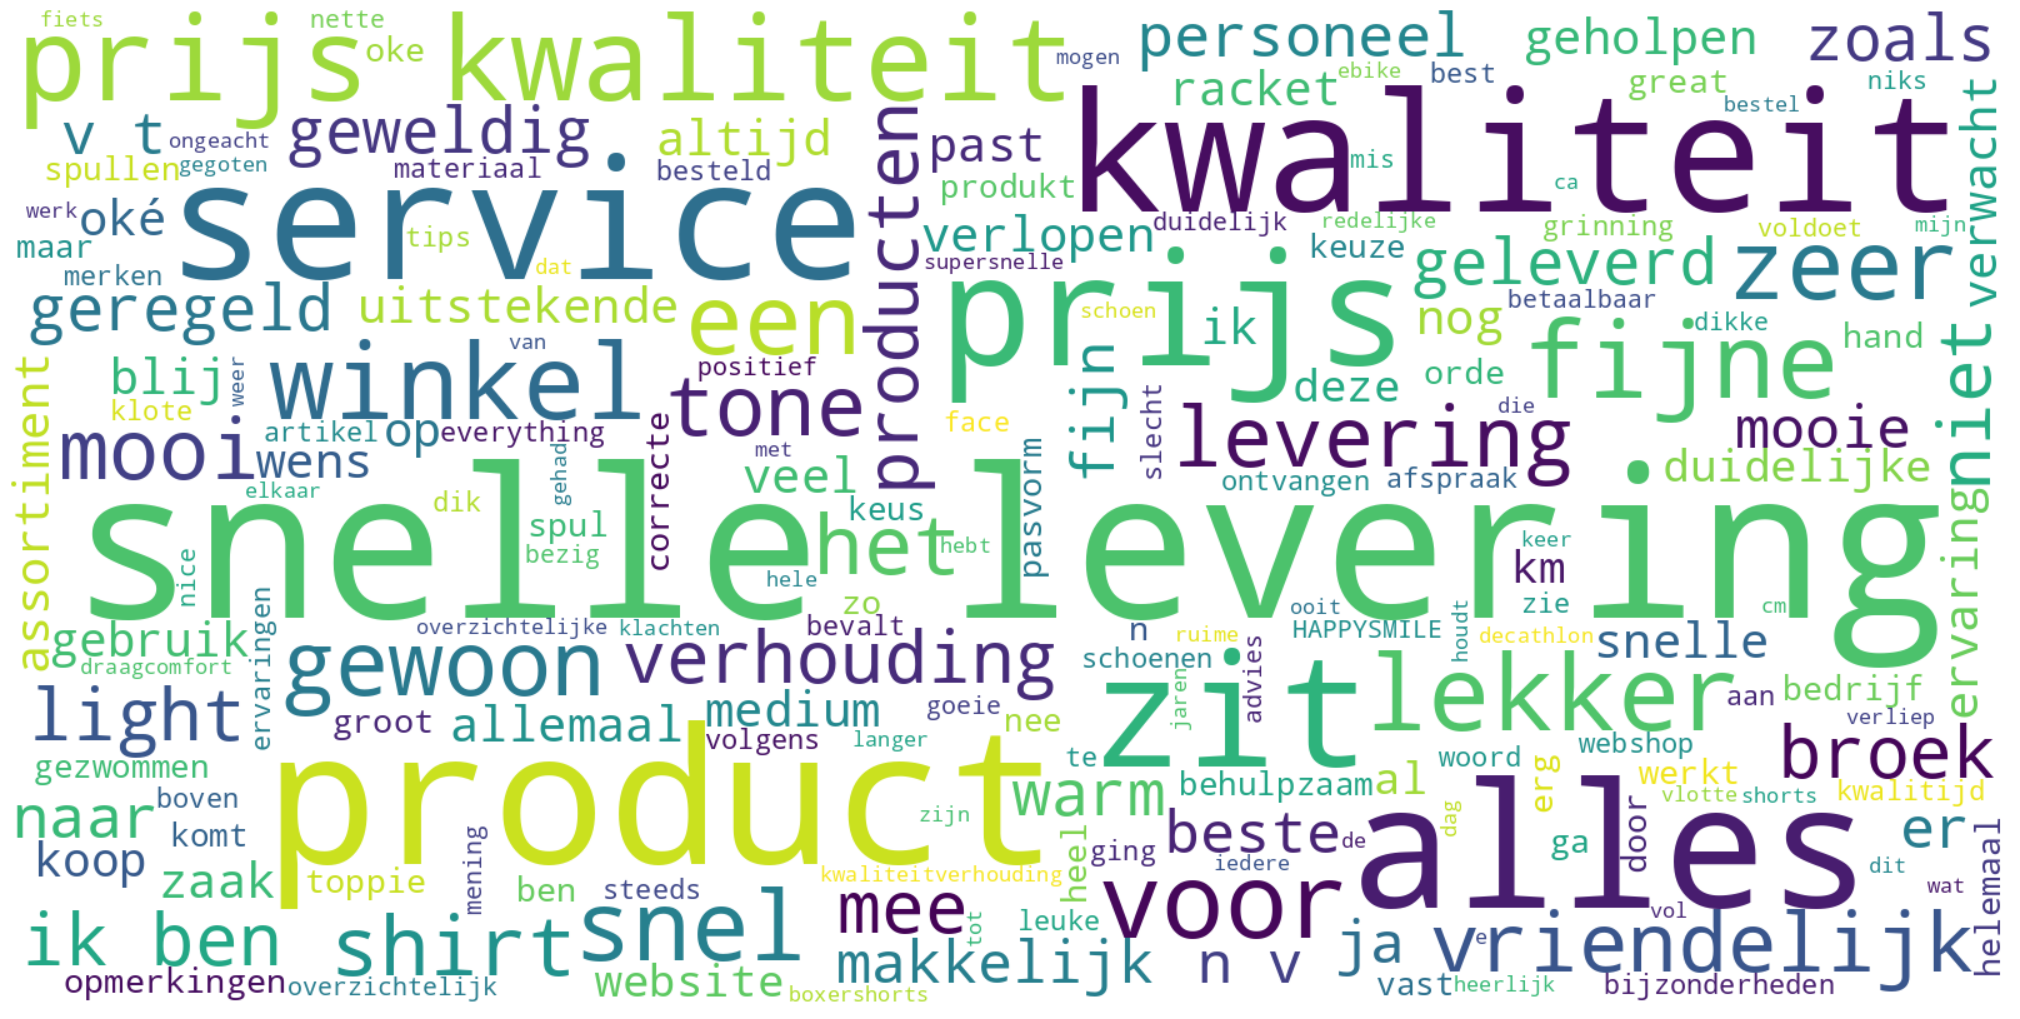

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract individual words from tuples in new_mostcommon
word_list = [' '.join(words) for words in new_mostcommon]

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(word_list))

# Display the word cloud
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# saving preprocessed file
df1.to_excel('preprocessed_cleaneddata.xlsx', index=False)

files.download("preprocessed_cleaneddata.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_web = df1[df1['touchpoint_type'] == 'web']
subset_app = df1[df1['touchpoint_type'] == 'app']
subset_digital = df1[df1['touchpoint_type'] == 'digitalinstore']
subset_physical = df1[df1['touchpoint_type'] == 'physical']


# Physical wordlcoud

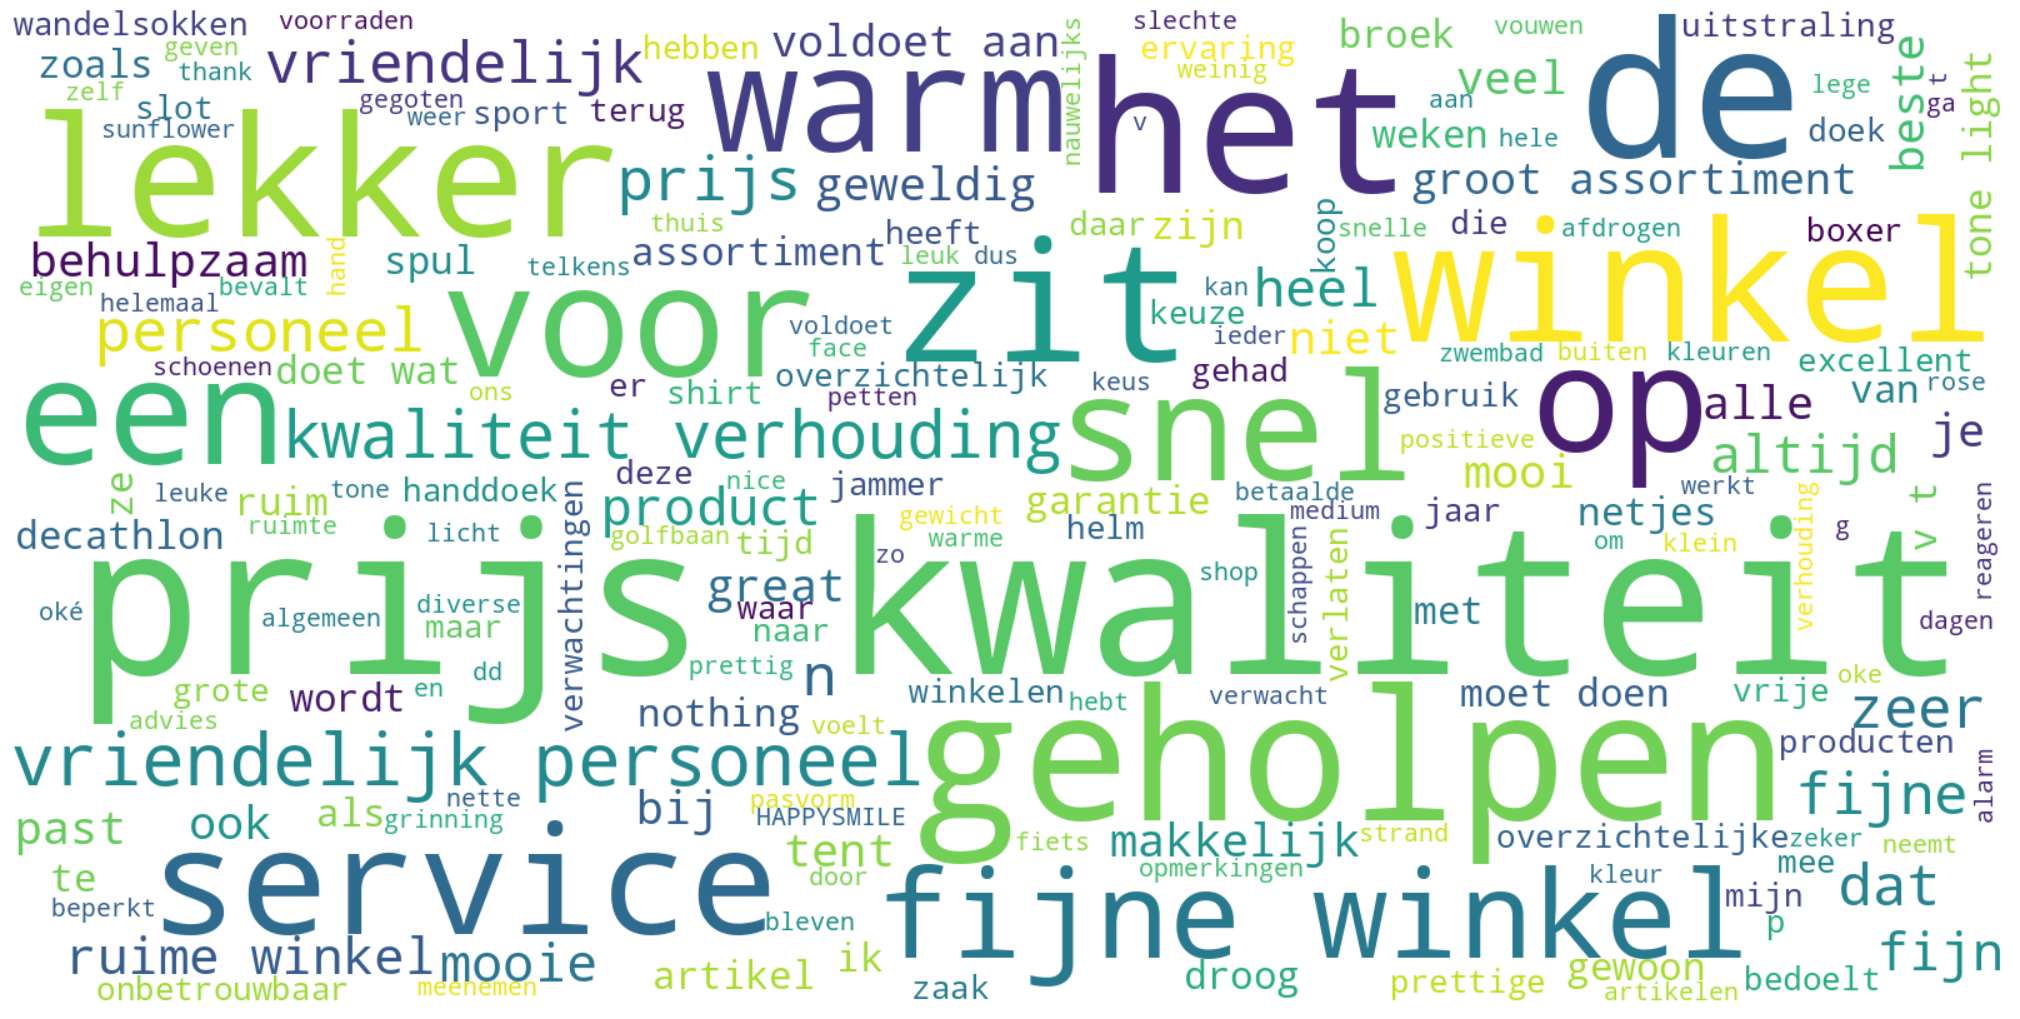

In [ ]:
from nltk.probability import FreqDist

# Convert the list of tokens to tuples
token_tuples = [tuple(tokens) for tokens in subset_physical['text_token_new']]

# Calculate the frequency distribution
mostcommon = FreqDist(token_tuples).most_common(200)

# Extract the first element (word) from each tuple
new_mostcommon = [item[0] for item in mostcommon]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract individual words from tuples in new_mostcommon
word_list = [' '.join(words) for words in new_mostcommon]

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(word_list))

# Display the word cloud
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Digital wordcloud

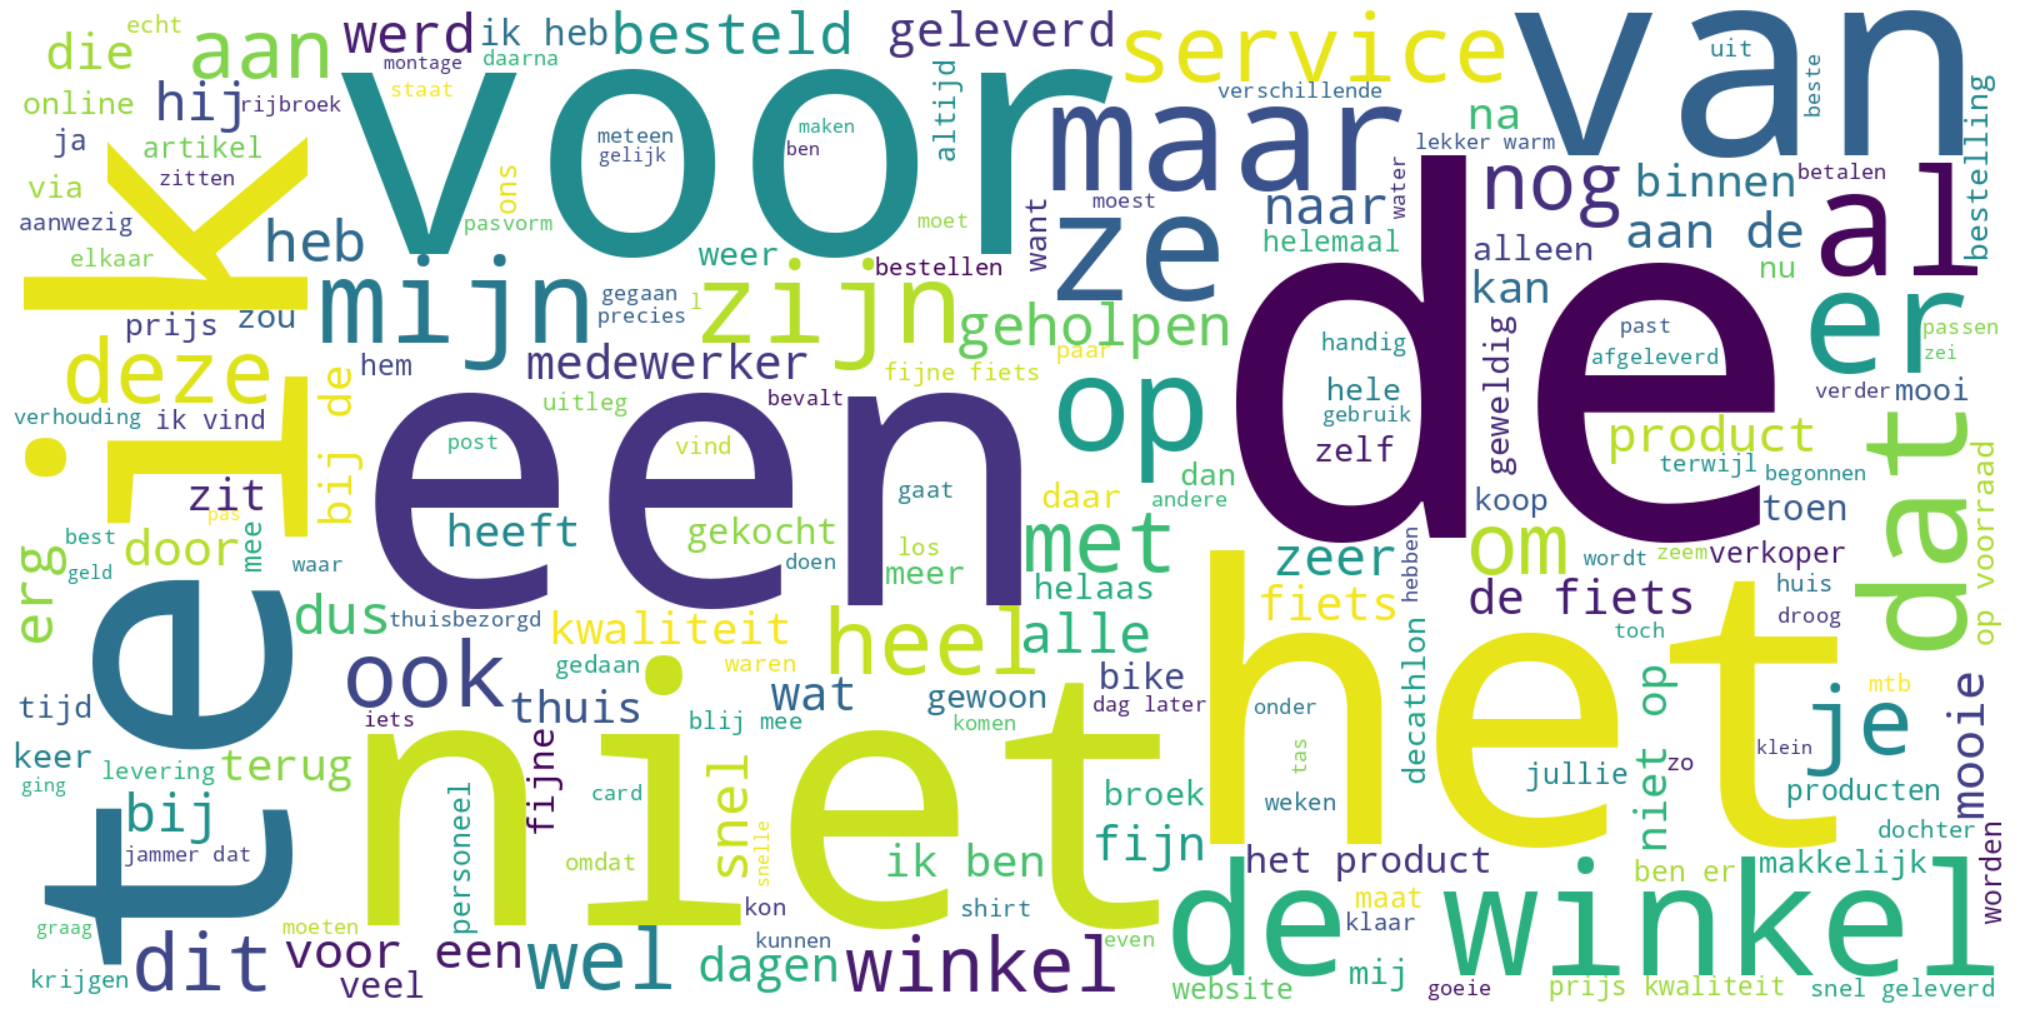

In [ ]:
from nltk.probability import FreqDist

# Convert the list of tokens to tuples
token_tuples = [tuple(tokens) for tokens in subset_digital['text_token_new']]

# Calculate the frequency distribution
mostcommon = FreqDist(token_tuples).most_common(200)

# Extract the first element (word) from each tuple
new_mostcommon = [item[0] for item in mostcommon]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract individual words from tuples in new_mostcommon
word_list = [' '.join(words) for words in new_mostcommon]

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(word_list))

# Display the word cloud
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# App wordcloud

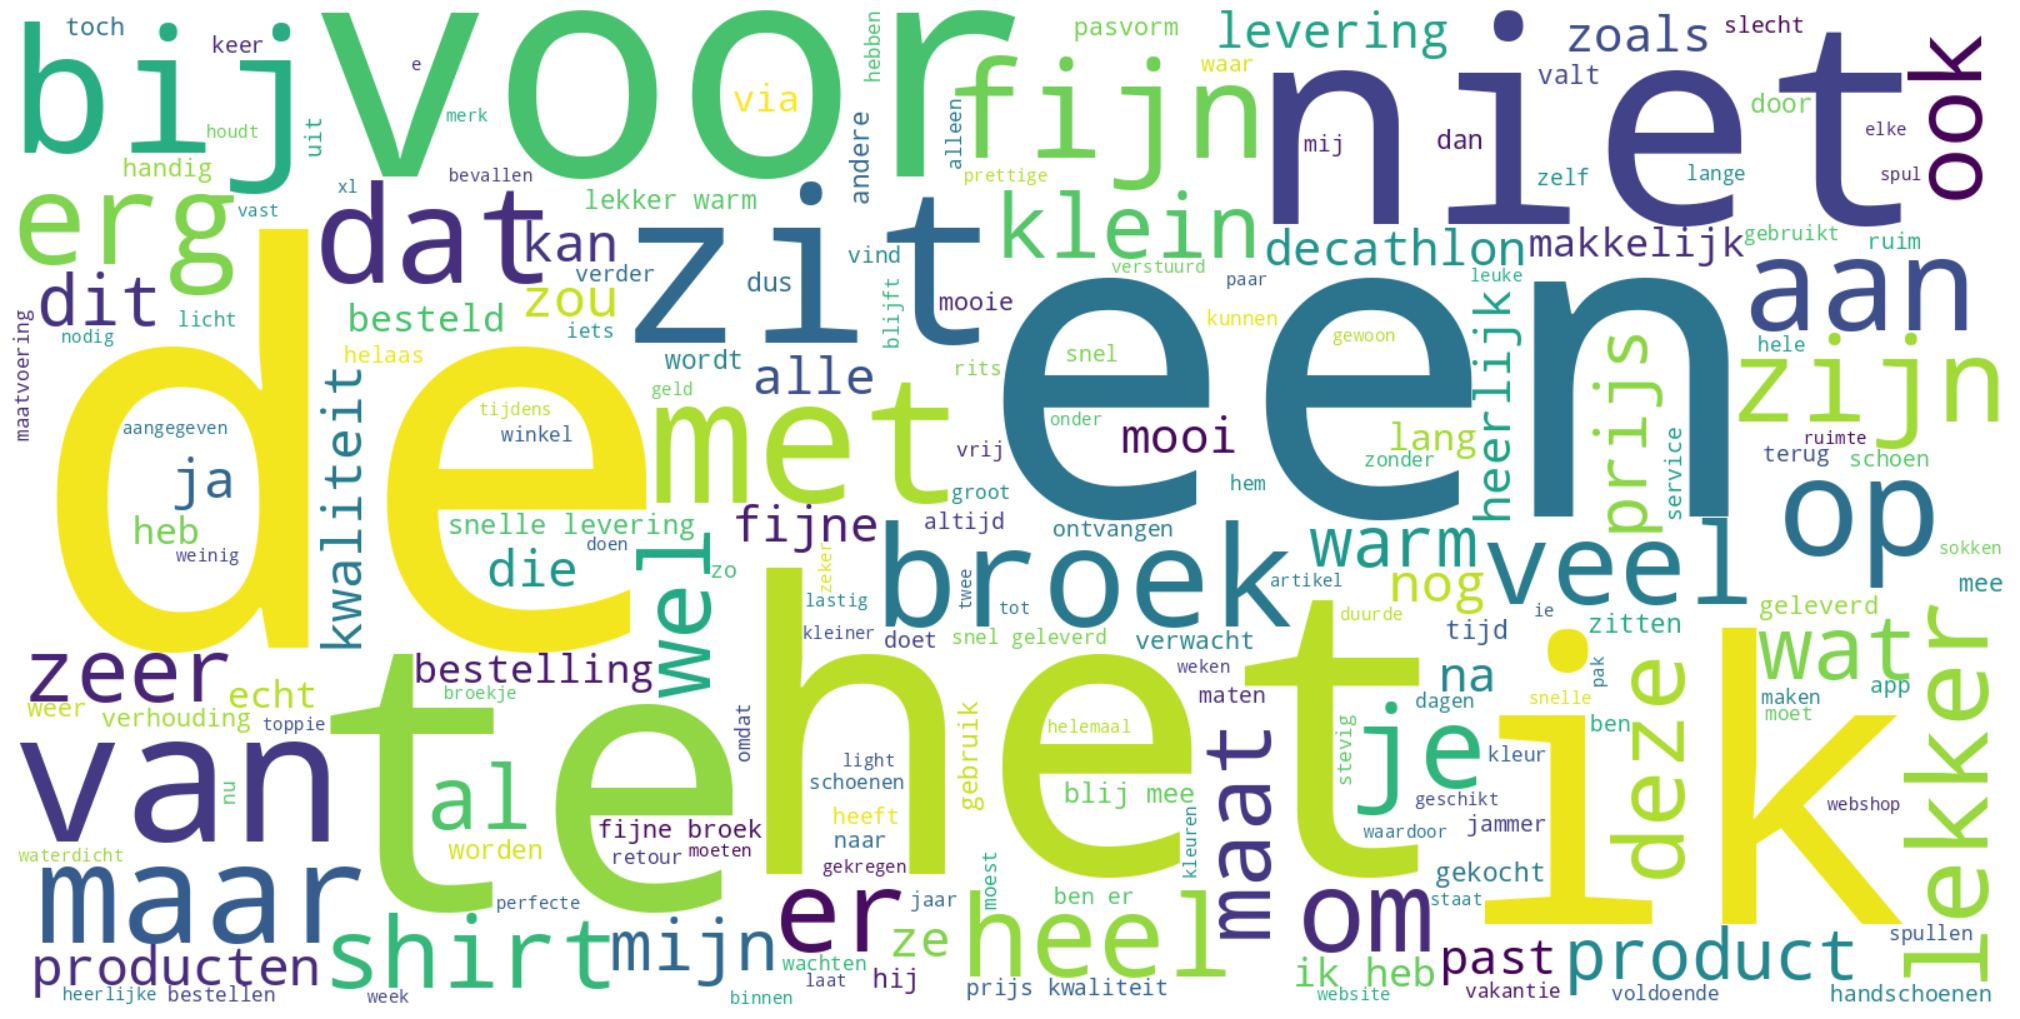

In [ ]:
from nltk.probability import FreqDist

# Convert the list of tokens to tuples
token_tuples = [tuple(tokens) for tokens in subset_app['text_token_new']]

# Calculate the frequency distribution
mostcommon = FreqDist(token_tuples).most_common(200)

# Extract the first element (word) from each tuple
new_mostcommon = [item[0] for item in mostcommon]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract individual words from tuples in new_mostcommon
word_list = [' '.join(words) for words in new_mostcommon]

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(word_list))

# Display the word cloud
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WEB wordcloud

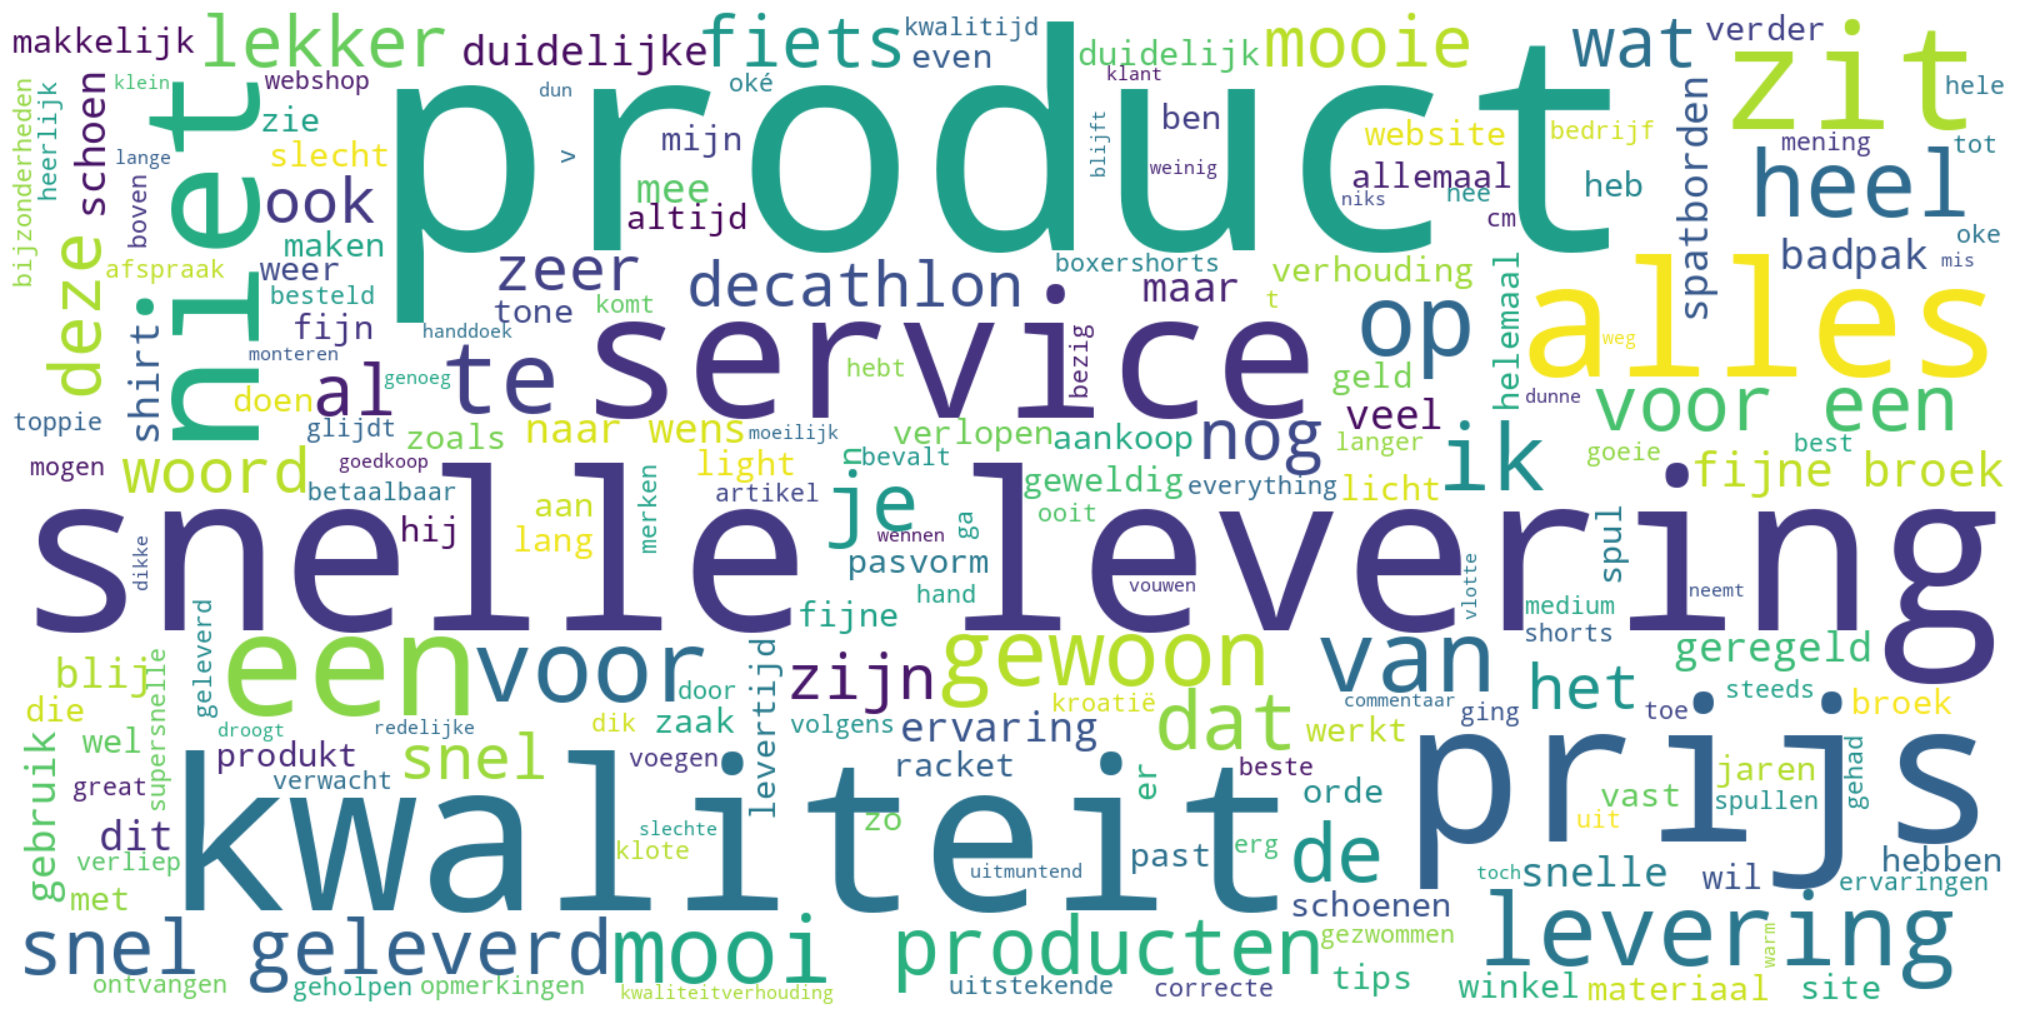

In [ ]:
from nltk.probability import FreqDist

# Convert the list of tokens to tuples
token_tuples = [tuple(tokens) for tokens in subset_web['text_token_new']]

# Calculate the frequency distribution
mostcommon = FreqDist(token_tuples).most_common(200)

# Extract the first element (word) from each tuple
new_mostcommon = [item[0] for item in mostcommon]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract individual words from tuples in new_mostcommon
word_list = [' '.join(words) for words in new_mostcommon]

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(word_list))

# Display the word cloud
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Label data (score) - EDA

In [ ]:

# Convert 'note' column to integers
df['note'] = df['note'].astype(int)

# Check the unique values in 'note'
unique_values = df['note'].unique()
class_counts = df['note'].value_counts()
print(class_counts)


In [ ]:
# Sort the class_counts by index in ascending order
class_counts_sorted = class_counts.sort_index()

# Plot the bar chart with sorted x-axis labels
class_counts_sorted.plot(kind='bar',rot=0)

# Set the x-axis label and y-axis label
plt.xlabel('review score')
plt.ylabel('count')

# Show the plot
plt.show()

In [ ]:
# Function to convert score to sentiment
def to_sentiment(rating):
    rating = int(rating)

    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply to the dataset
df['sentiment'] = df['note'].apply(to_sentiment)

In [ ]:
# Convert 'note' column to integers
df['sentiment'] = df['sentiment'].astype(int)

# Check the unique values in 'note'
class_counts_sentiment = df['sentiment'].value_counts()
print(class_counts_sentiment)

In [ ]:
# Plot the distribution
class_counts_sentiment.plot(kind='bar')
plt.xlabel('review score')
plt.ylabel('count')

# Change x-axis tick labels
plt.xticks(range(len(class_counts_sentiment.index)), ['positive', 'negative', 'neutral'], rotation=0)

plt.show()